In [119]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier


import joblib

In [120]:
# importing file from github
file = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [121]:
# storing in dataframe
df = pd.DataFrame(file)

In [122]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Taking random 3 rows
df.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5
618,11.4,0.46,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5
1134,8.5,0.28,0.35,1.7,0.061,6.0,15.0,0.99524,3.30,0.74,11.8,7


In [6]:
# looking null and dtypes by info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# checking null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## EDA PROCESS

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

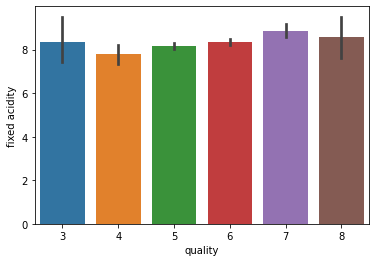

In [11]:
# Visualizing Data

#fixed acidity relation
sns.barplot(df['quality'],df['fixed acidity'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

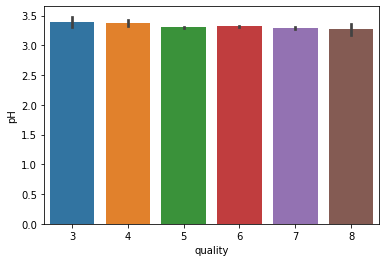

In [12]:
# pH relation
sns.barplot(df['quality'],df['pH'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

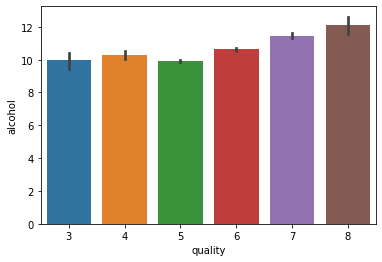

In [14]:
#alcohol relation
sns.barplot(df['quality'],df['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='density'>

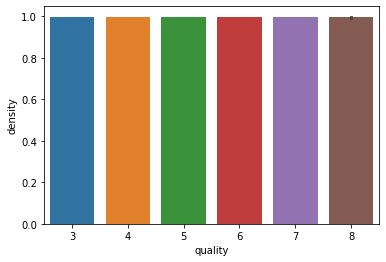

In [16]:
#density relation
sns.barplot(df['quality'],df['density'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

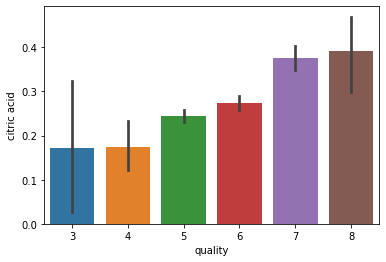

In [17]:
# citric acid
sns.barplot(df['quality'],df['citric acid'])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

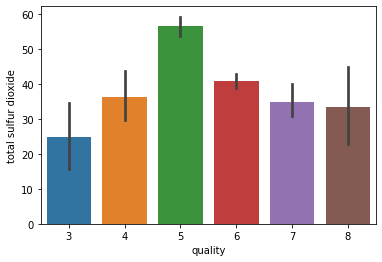

In [18]:
# total sulfer dioxide
sns.barplot(df['quality'],df['total sulfur dioxide'])

In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='density', ylabel='alcohol'>

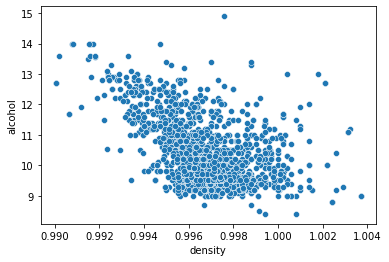

In [19]:
sns.scatterplot(df['density'],df['alcohol'])

<AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>

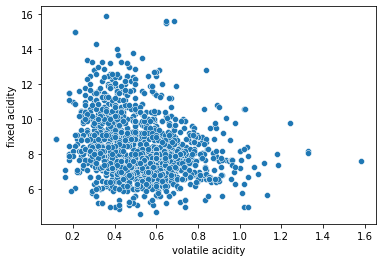

In [20]:
sns.scatterplot(df['volatile acidity'],df['fixed acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='residual sugar'>

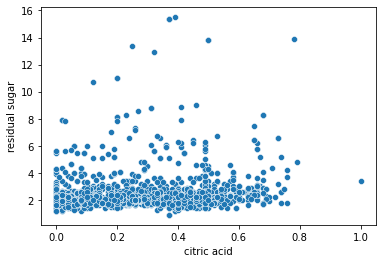

In [5]:
sns.scatterplot(df['citric acid'],df['residual sugar'])

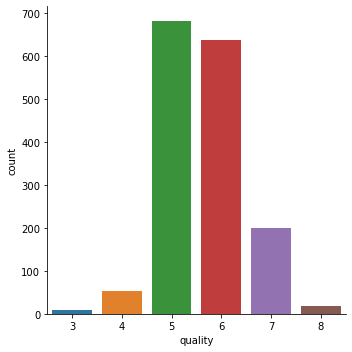

In [8]:
sns.catplot(x='quality',data=df,kind = 'count')

## Statistical Summary

In [168]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,46.467792,0.996747,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,32.895324,0.001887,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,6.000000,0.990070,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,22.000000,0.995600,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,38.000000,0.996750,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,62.000000,0.997835,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,289.000000,1.003690,2.000000,14.900000,8.000000


### Correlation Test

<AxesSubplot:>

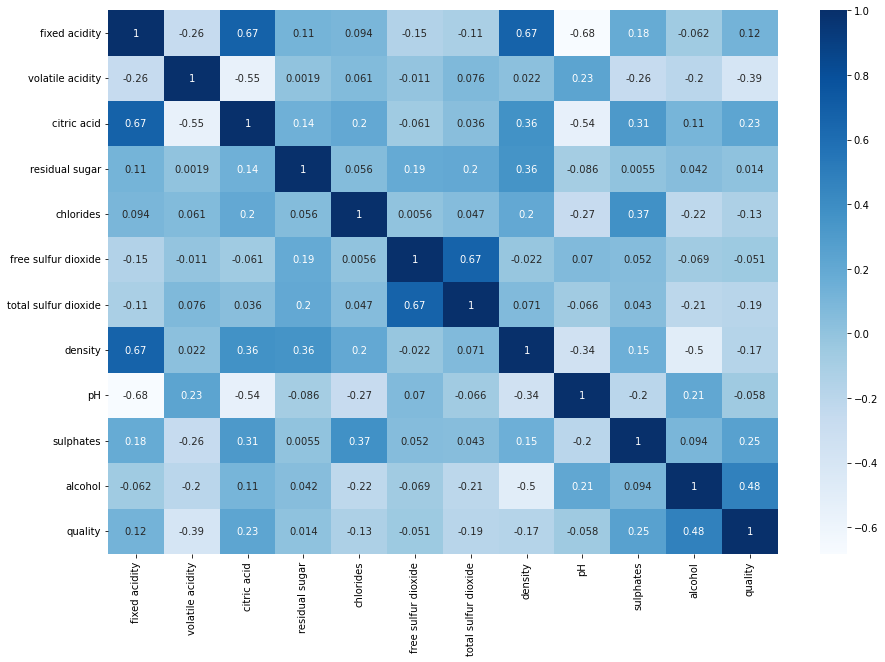

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [124]:
df.drop('pH',axis=1,inplace=True)

In [125]:
df.drop('free sulfur dioxide',axis=1,inplace=True)

In [126]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,0.71,10.2,5


## Feature Engineerinng

In [127]:
# removing Oultliers

In [128]:
z = np.abs(zscore(df))

In [129]:
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.558274,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.624363,0.028261,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.229047,0.134264,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.411500,0.664277,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.558274,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,0.075043,0.978765,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,0.137820,0.862162,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,0.196679,0.533554,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,0.075043,0.676657,0.305990,0.209308,0.787823


In [130]:
df1=df[(z<3).all(axis=1)]

In [131]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,0.71,10.2,5


## Data Preprocessing

In [64]:
#sepraing x,y variable

In [132]:
x=df.drop('quality',axis=1)

In [133]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,0.71,10.2


In [134]:
#making y vaiable to 0,1 with condition of 0 for < 7 , 1 for >=7

In [135]:
y = df['quality'].apply(lambda value:1 if value>=7 else 0)

In [136]:
y.unique()

array([0, 1], dtype=int64)

In [137]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### VIF

In [138]:
def vif_calculator():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [139]:
vif_calculator()

          vif               columns
0   51.633004         fixed acidity
1   16.353102      volatile acidity
2    8.911294           citric acid
3    4.619345        residual sugar
4    6.229447             chlorides
5    3.587880  total sulfur dioxide
6  218.064612               density
7   21.561067             sulphates
8  119.213681               alcohol


In [145]:
x.drop('density',axis=1,inplace=True)

In [146]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,34.0,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,67.0,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,54.0,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,60.0,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.71,10.2


### Scaling data

In [147]:
ss = StandardScaler()

In [148]:
x=ss.fit_transform(x)

In [149]:
SMT = SMOTE()

In [150]:
new_x,new_y=SMT.fit_resample(x,y)

In [151]:
new_y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

#### Spliting x,y in train , test data

In [152]:
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y, test_size = 0.2, random_state=28)

In [154]:
x_train

array([[-0.58581266,  1.71605101, -1.23742089, ..., -0.8352672 ,
        -1.11032421, -0.77251161],
       [ 2.05702739, -0.82579583,  1.12470036, ..., -0.13586095,
        -0.28414114, -0.11544087],
       [ 0.02375201, -1.20458254,  0.98379216, ..., -0.82229521,
        -0.07111639,  1.43107163],
       ...,
       [ 0.44834214, -0.8816606 ,  0.25174251, ..., -0.95690307,
         0.83710732,  0.72936437],
       [-0.52835961, -1.55203779,  0.09769112, ...,  0.07700182,
         0.60105502,  0.44776263],
       [-0.70071875, -0.37887771, -0.36446304, ...,  0.22904665,
        -0.10710191, -0.02157362]])

In [155]:
y_test

1217    0
1319    0
1420    0
765     0
584     1
       ..
1903    1
2193    1
1616    1
1248    0
1400    0
Name: quality, Length: 553, dtype: int64

In [156]:
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
svc = SVC()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [157]:
estimators=[knn,dtc,svc,RFC,GBC,ABC]
VotingClassifier(estimators=estimators)

VotingClassifier(estimators=[KNeighborsClassifier(), DecisionTreeClassifier(),
                             SVC(), RandomForestClassifier(),
                             GradientBoostingClassifier(),
                             AdaBoostClassifier()])

In [159]:
models = [dtc,svc,knn,RFC,GBC,ABC]

In [162]:
for i in models:
    i.fit(x_train,y_train)
    models_pred=i.predict(x_test)
    print('cross_val_score of ',i,cross_val_score(i, x, y, cv=11))
    print('mean cross_val_score',i,cross_val_score(i, x, y, cv=11).mean())
    print('\n')

cross_val_score of  DecisionTreeClassifier() [0.89726027 0.89041096 0.84246575 0.73287671 0.87586207 0.91034483
 0.76551724 0.75862069 0.7862069  0.8137931  0.82068966]
mean cross_val_score DecisionTreeClassifier() 0.8361360415682569


cross_val_score of  SVC() [0.88356164 0.86986301 0.88356164 0.82191781 0.90344828 0.91724138
 0.87586207 0.88275862 0.86896552 0.86896552 0.90344828]
mean cross_val_score SVC() 0.8799630695237686


cross_val_score of  KNeighborsClassifier() [0.88356164 0.86986301 0.78767123 0.78767123 0.91724138 0.92413793
 0.88965517 0.80689655 0.87586207 0.86206897 0.85517241]
mean cross_val_score KNeighborsClassifier() 0.8599819641860266


cross_val_score of  RandomForestClassifier() [0.90410959 0.88356164 0.86986301 0.84246575 0.91724138 0.91034483
 0.89655172 0.86896552 0.88965517 0.88275862 0.89655172]
mean cross_val_score RandomForestClassifier() 0.8755786490316485


cross_val_score of  GradientBoostingClassifier() [0.90410959 0.86986301 0.86986301 0.7739726  0.91

### HyperParameter Tuning

In [164]:
svc_parameters= {'kernel': ['linear','rbf']}

In [165]:
gscv = GridSearchCV(svc,svc_parameters)

In [166]:
gscv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf']})

In [167]:
print('best score is:',gscv.best_score_,'\n','best estimator_s kernal:',gscv.best_estimator_.kernel,'best parameter :',gscv.best_params_)

best score is: 0.8448668580125226 
 best estimator_s kernal: rbf best parameter : {'kernel': 'rbf'}


## Making Algorithms

In [174]:
def prediction(data1):
    data1= np.array(data1)
    data1= data1.reshape(1,-1)
    pred= RFC.predict(data1)
    print(pred)
    if pred == 0:
        print('Not Good')
    elif pred == 1:
        print('Good')
    print("cv_score",cross_val_score(svc,x,y,cv=9).mean())

In [178]:
df1.sample(1) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
1016,8.9,0.38,0.4,2.2,0.068,28.0,0.99486,0.75,12.6,7


array([ 0.33343606, -0.82579583,  0.66254621, -0.24037503, -0.41373646,
       -0.56158649,  0.54204194,  2.04350586])

In [184]:
data1= [8.9,0.38,0.4,2.2,0.068,28.0,0.75,12.6]

In [185]:
prediction(data1)

[0]
Not Good
cv_score 0.8824315650634448


## Saving Algorithm

In [186]:
joblib.dump(svc,'DT-1')

['DT-1']